In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import glob
sns.set_style('white')


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/Users/sbandya/miniconda3/envs/napari-env/bin/python"
  * The NumPy version is: "1.22.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/sbandya/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so, 0x0002): Library not loaded: '@rpath/libcblas.3.dylib'
  Referenced from: '/Users/sbandya/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so'
  Reason: tried: '/Users/sbandya/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/../../../../libcblas.3.dylib' (no such file), '/Users/sbandya/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/../../../../libcblas.3.dylib' (no such file), '/Users/sbandya/miniconda3/envs/napari-env/bin/../lib/libcblas.3.dylib' (no such file), '/Users/sbandya/miniconda3/envs/napari-env/bin/../lib/libcblas.3.dylib' (no such file), '/usr/local/lib/libcblas.3.dylib' (no such file), '/usr/lib/libcblas.3.dylib' (no such file)


In [2]:
sample_list = pd.read_csv("/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/sample_list.csv",sep=",",header=0)

am_path= "/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/analysis/annotation_measurements/"
dm_path= "/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/analysis/detection_measurements/"

figure_outputs = "/Users/sbandya/Desktop/dev/hemocyte_ImageSegmentation/analysis/figures/"
sample_list[:5]


,Sample #,Genotype,Condition,n,date
0,1,HML-GFP,C,8,9/27/2020
1,2,HML-GFP,C,7,9/27/2020
2,3,roGFP,C,10,9/27/2020
3,4,roGFP,C,9,9/27/2020
4,5,drpr∆5,C,7,9/27/2020


In [3]:
## Create a dataframe of annotation measurements for all images

def get_sample_condition(imagename,sample_mapping):
    sampleid = imagename[:2]
    condition = sample_mapping[sample_mapping['Sample #'] == int(sampleid)]
    return condition['Condition'].iloc[0]

all_annotation_measurement_files = glob.glob(path.join(am_path , "*.txt"))

am_list = []
for amf in all_annotation_measurement_files:
    df = pd.read_csv(amf, index_col=None, header=0, sep="\t")
    am_list.append(df)

annotation_measurements = pd.concat(am_list, axis=0, ignore_index=True)
annotation_measurements['condition'] = annotation_measurements['Image'].apply(get_sample_condition,sample_mapping=sample_list)
#annotation_measurements = annotation_measurements.loc[annotation_measurements["condition"] == "C", "condition"] = 'Fed'
annotation_measurements['condition'] = np.where(annotation_measurements['condition'] == 'C', 'Fed', annotation_measurements['condition'])
annotation_measurements['condition'] = np.where(annotation_measurements['condition'] == 'S', 'Starved', annotation_measurements['condition'])

annotation_measurements.columns = annotation_measurements.columns.str.replace('Centroid X µm', 'Centroid_X')
annotation_measurements.columns = annotation_measurements.columns.str.replace('Centroid Y µm', 'Centroid_Y')
print(annotation_measurements.shape)
annotation_measurements[:5]



(275, 14)


,Image,Name,Class,Parent,ROI,Centroid_X,Centroid_Y,Num Detections,Num Positive,Positive %,Num Positive per mm^2,Area µm^2,Perimeter µm,condition
0,73F_3_FITC.tif,PathAnnotationObject,NaN,Image,Polygon,428.06,311.66,41,41,100,303.92,134903.3,1435.90,Fed
1,73F_2_FITC.tif,PathAnnotationObject,NaN,Image,Polygon,429.21,323.35,39,39,100,251.08,155328.9,1670.40,Fed
2,60C_5_FITC.tif,PathAnnotationObject,NaN,Image,Polygon,450.16,281.02,10,10,100,53.41,187221.5,1667.40,Fed
3,52E_1_FITC.tif,PathAnnotationObject,NaN,Image,Polygon,210.09,164.56,10,10,100,233.14,42891.9,797.06,Fed
4,60C_4_FITC.tif,PathAnnotationObject,NaN,Image,Polygon,454.92,327.59,27,27,100,153.15,176300.1,1744.70,Fed


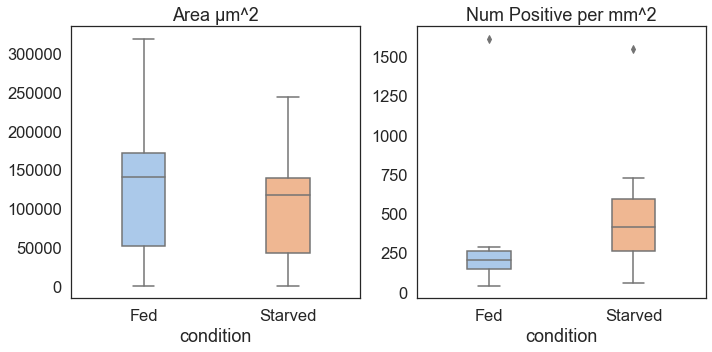

In [4]:
sns.set(font_scale=1.5)
sns.set_style("white")
group_desc = annotation_measurements.groupby(['condition']).describe().T

#print(group_desc)

fig, ax = plt.subplots(1,2, figsize=(10,5))


sns.boxplot(data=group_desc.loc['Area µm^2'], ax= ax[0],width=0.3,palette="pastel")
ax[0].set_title("Area µm^2")

sns.boxplot(data=group_desc.loc['Num Positive per mm^2'], ax = ax[1],width=0.3,palette="pastel")
ax[1].set_title("Num Positive per mm^2")



fig.tight_layout()
fig.savefig(figure_outputs+"annotation_area_numpos.png")


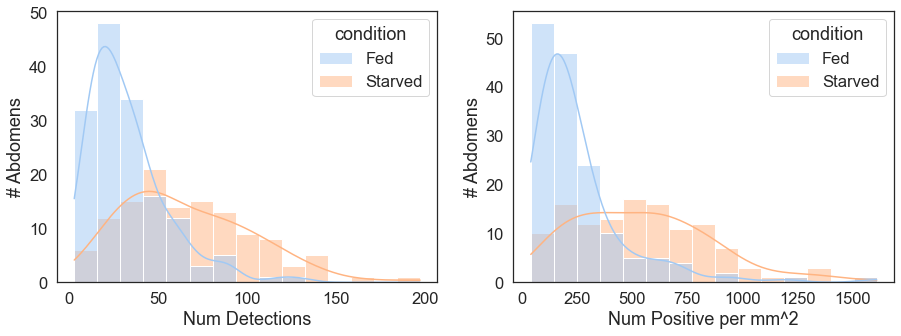

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data = annotation_measurements, 
             x= 'Num Detections', bins=15,kde=True, hue='condition',palette="pastel",ax=ax[0])
ax[0].set(xlabel='Num Detections', ylabel='# Abdomens')

sns.histplot(data = annotation_measurements, 
             x= 'Num Positive per mm^2', bins=15,kde=True, hue='condition',palette="pastel",ax=ax[1])
ax[1].set(xlabel='Num Positive per mm^2', ylabel='# Abdomens')
fig.savefig(figure_outputs+"annotation_numdetect_dist.png")


In [9]:
from scipy.spatial import distance
import math 
sns.set_palette("pastel")

def get_centroid_distance(image,x,y,polygon):
    polygon_x = annotation_measurements[annotation_measurements['Image']==image]['Centroid_X'].iloc[0]
    polygon_y = annotation_measurements[annotation_measurements['Image']==image]['Centroid_Y'].iloc[0]
    centroid_distance = distance.euclidean([polygon_x, polygon_y], [x,y])

    return centroid_distance
    

all_detection_measurement_files = glob.glob(path.join(dm_path , "*.txt"))
centroid_distances = {}
fed_centroid_distances = list()
starved_centroid_distances = []

for dm in all_detection_measurement_files:
    detection_measurements = pd.read_csv(dm,sep="\t",header=0)
    detection_measurements.columns = detection_measurements.columns.str.replace('Centroid X µm', 'Centroid_X')
    detection_measurements.columns = detection_measurements.columns.str.replace('Centroid Y µm', 'Centroid_Y')
    

        
    detection_measurements["centroid_distances"] = detection_measurements.apply(
        lambda x: get_centroid_distance(x.Image, x.Centroid_X,x.Centroid_Y,polygon=annotation_measurements), axis=1)
    
    #print(detection_measurements[:5])
    
    centroid_distances[detection_measurements['Image'].iloc[0]] =  detection_measurements['centroid_distances'].to_list()
    #print(centroid_distances)
    
    condition = annotation_measurements[annotation_measurements['Image'] == detection_measurements['Image'].iloc[0]]
    
    #print(condition['condition'].iloc[0])
    
    if condition['condition'].iloc[0] == 'Fed':
        fed_centroid_distances.append(detection_measurements['centroid_distances'].to_list())
        #sns.histplot(detection_measurements['centroid_distances'].to_list(),kde=False, color='xkcd:azure', bins=3)
    else: 
        starved_centroid_distances.append(detection_measurements['centroid_distances'].to_list())
        #sns.histplot(detection_measurements['centroid_distances'].to_list(),kde=False, color='orange',bins=3)
    




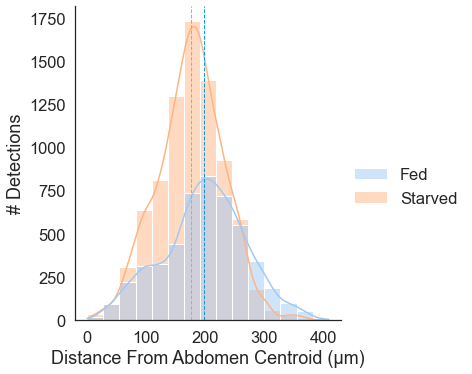

In [7]:
fed_unravel = [element for sublist in fed_centroid_distances for element in sublist]
starved_unravel = [element for sublist in starved_centroid_distances for element in sublist]

centroid_dist_df = pd.DataFrame({'Fed' : pd.Series(fed_unravel),'Starved': pd.Series(starved_unravel)})


centroid_bins = sns.displot(centroid_dist_df ,kde=True, bins=15,palette="pastel")
centroid_bins.set(xlabel='Distance From Abdomen Centroid (µm)', ylabel='# Detections')

plt.axvline(x=centroid_dist_df['Fed'].mean(),
            color='xkcd:azure',
            ls='--', 
            lw=1)


plt.axvline(x=centroid_dist_df['Starved'].mean(),
            color='orange',
            ls='--', 
            lw=1)

centroid_bins.savefig(figure_outputs+"centroid_dist_histogram.png")


In [8]:
import scipy
from scipy.stats import ttest_ind
test_hypothesis = scipy.stats.ttest_ind(centroid_dist_df['Fed'], centroid_dist_df['Starved'], 
                      axis=0, 
                      equal_var=False, 
                      nan_policy='omit', 
                      alternative='greater', 
                      trim=0)

print(test_hypothesis)
print(test_hypothesis.pvalue < 0.05)
centroid_dist_df.describe()

Ttest_indResult(statistic=18.736680883840265, pvalue=3.923811721286487e-77)
True


,Fed,Starved
count,4951.000000,8116.000000
mean,198.583201,176.363118
std,70.800401,56.543179
min,3.865049,1.176138
25%,156.108463,140.370778
50%,202.061220,178.221302
75%,246.071615,213.545343
max,409.085083,396.400054


In [9]:
all_detection_measurement_files = glob.glob(path.join(dm_path , "*.txt"))


for dm in all_detection_measurement_files:
    detection_measurements = pd.read_csv(dm,sep="\t",header=0)
    print(detection_measurements.columns)
    break
 

Index(['Image', 'Name', 'Class', 'Parent', 'ROI', 'Centroid X µm',
       'Centroid Y µm', 'Nucleus: Area', 'Nucleus: Perimeter',
       'Nucleus: Circularity', 'Nucleus: Max caliper', 'Nucleus: Min caliper',
       'Nucleus: Eccentricity', 'Nucleus: Red mean', 'Nucleus: Red sum',
       'Nucleus: Red std dev', 'Nucleus: Red max', 'Nucleus: Red min',
       'Nucleus: Red range', 'Nucleus: Green mean', 'Nucleus: Green sum',
       'Nucleus: Green std dev', 'Nucleus: Green max', 'Nucleus: Green min',
       'Nucleus: Green range', 'Nucleus: Blue mean', 'Nucleus: Blue sum',
       'Nucleus: Blue std dev', 'Nucleus: Blue max', 'Nucleus: Blue min',
       'Nucleus: Blue range', 'Cell: Area', 'Cell: Perimeter',
       'Cell: Circularity', 'Cell: Max caliper', 'Cell: Min caliper',
       'Cell: Eccentricity', 'Cell: Red mean', 'Cell: Red std dev',
       'Cell: Red max', 'Cell: Red min', 'Cell: Green mean',
       'Cell: Green std dev', 'Cell: Green max', 'Cell: Green min',
       'Cell: Blue

In [16]:
dftest = pd.DataFrame.from_dict(centroid_distances, orient='index')

In [17]:
dftest[:5]

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
73F_3_FITC.tif,174.393094,163.353602,162.194930,191.675623,192.950657,133.814274,132.306554,128.290695,191.581109,202.730010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73F_2_FITC.tif,186.162565,225.962848,199.356510,217.725762,164.460173,216.536612,211.268336,159.278036,243.508039,209.348766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60C_5_FITC.tif,249.021149,162.659658,233.308292,189.398333,169.629795,261.916271,266.990193,170.115278,237.263515,200.211296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52E_1_FITC.tif,87.194441,75.239812,91.406972,126.383591,126.165502,125.597263,129.757466,113.642598,101.834914,118.805462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60C_4_FITC.tif,180.836882,176.627374,284.191976,260.490243,262.029617,275.242668,8.055967,18.648029,170.830836,173.803761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


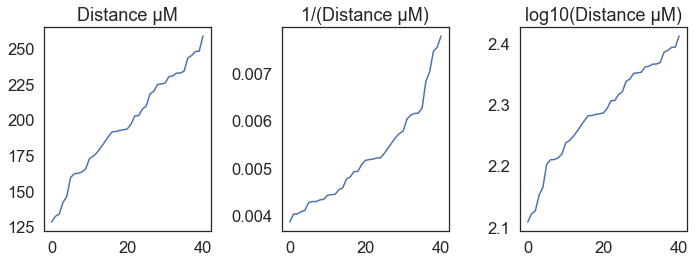

In [173]:
for image in centroid_distances:
    fig, ax = plt.subplots(1,3,figsize=(10,4))
    ax[0].plot(sorted(centroid_distances[image]))
    ax[0].set_title("Distance µM")
    
    scaled_distances = [1/i for i in centroid_distances[image]]    
    ax[1].plot(sorted(scaled_distances))
    ax[1].set_title("1/(Distance µM)")
    
    log10_distances = [math.log10(i) for i in centroid_distances[image]] 
    ax[2].plot(sorted(log10_distances))
    ax[2].set_title("log10(Distance µM)")
    
    fig.tight_layout()
    fig.savefig(figure_outputs+"scaling.png")
    break

In [139]:
image_id = []
area_normalized = []
condition = []
for image in centroid_distances.keys():

    area = annotation_measurements[annotation_measurements['Image']==image]['Area µm^2'].iloc[0]
    #area_normalized_distances = sum([1/i for i in centroid_distances[image]])/area
    area_normalized_distances = sum(centroid_distances[image])/area
    
    image_id.append(image)
    area_normalized.append(area_normalized_distances)
    condition.append(annotation_measurements[annotation_measurements['Image']==image]['condition'].iloc[0])



In [143]:
area_normalized_df = pd.DataFrame({'Image': image_id,
                                   'Area_Normalized_Distances': area_normalized,
                                   'Condition': condition})
area_normalized_df['fly_id'] = area_normalized_df['Image'].str.split("_").str[0]
area_normalized_df[area_normalized_df['fly_id']=='52B']

,Image,Area_Normalized_Distances,Condition,fly_id
186,52B_4_FITC.tif,0.064605,Fed,52B
187,52B_5_FITC.tif,0.090163,Fed,52B
221,52B_3_FITC.tif,0.061043,Fed,52B
222,52B_2_FITC.tif,0.059733,Fed,52B


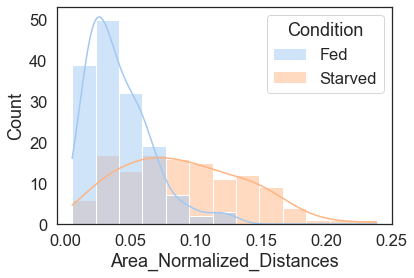

In [175]:
sns.histplot(data = area_normalized_df, 
             x ='Area_Normalized_Distances', kde='True',
             hue='Condition',
             palette="pastel")
plt.savefig(figure_outputs+"scaled_dist_histogram.png")

In [144]:
per_fly_ranges = area_normalized_df.groupby('fly_id').describe().T.reset_index(0)
per_fly_ranges = per_fly_ranges.drop(labels='level_0',axis=1)

per_fly_ranges

fly_id,24C,24D,24E,35A,36B,36D,36E,36G,36H,52B,...,86C,86D,86E,86F,90A,90B,90C,90D,90E,90F
count,2.000000,2.000000,5.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.000000
mean,0.052389,0.047388,0.061452,0.145519,0.085363,0.099673,0.112005,0.172513,0.125841,0.068886,...,0.130306,0.132228,0.186679,0.146992,0.020568,0.035752,0.032121,0.046438,0.070780,0.074186
std,0.000571,0.021307,0.019398,0.011482,NaN,0.017976,0.035224,NaN,NaN,0.014334,...,0.054099,0.023410,0.037544,0.021041,0.013837,0.016482,0.012943,0.018776,0.015099,0.031953
min,0.051985,0.032322,0.043574,0.137400,0.085363,0.086961,0.087098,0.172513,0.125841,0.059733,...,0.038011,0.104008,0.142184,0.115770,0.005306,0.020284,0.015889,0.014844,0.056514,0.040923
25%,0.052187,0.039855,0.050358,0.141459,0.085363,0.093317,0.099551,0.172513,0.125841,0.060716,...,0.133493,0.117289,0.160605,0.136670,0.012593,0.024055,0.023716,0.043769,0.063419,0.058958
50%,0.052389,0.047388,0.050535,0.145519,0.085363,0.099673,0.112005,0.172513,0.125841,0.062824,...,0.145767,0.128181,0.188964,0.152894,0.019565,0.027589,0.032368,0.055864,0.068312,0.076993
75%,0.052591,0.054922,0.072802,0.149578,0.085363,0.106028,0.124458,0.172513,0.125841,0.070994,...,0.156461,0.151255,0.202912,0.161699,0.027539,0.050261,0.039929,0.056905,0.069452,0.090818
max,0.052792,0.062455,0.089991,0.153637,0.085363,0.112384,0.136912,0.172513,0.125841,0.090163,...,0.177797,0.160408,0.238733,0.167928,0.037837,0.056571,0.048704,0.060806,0.096204,0.104643


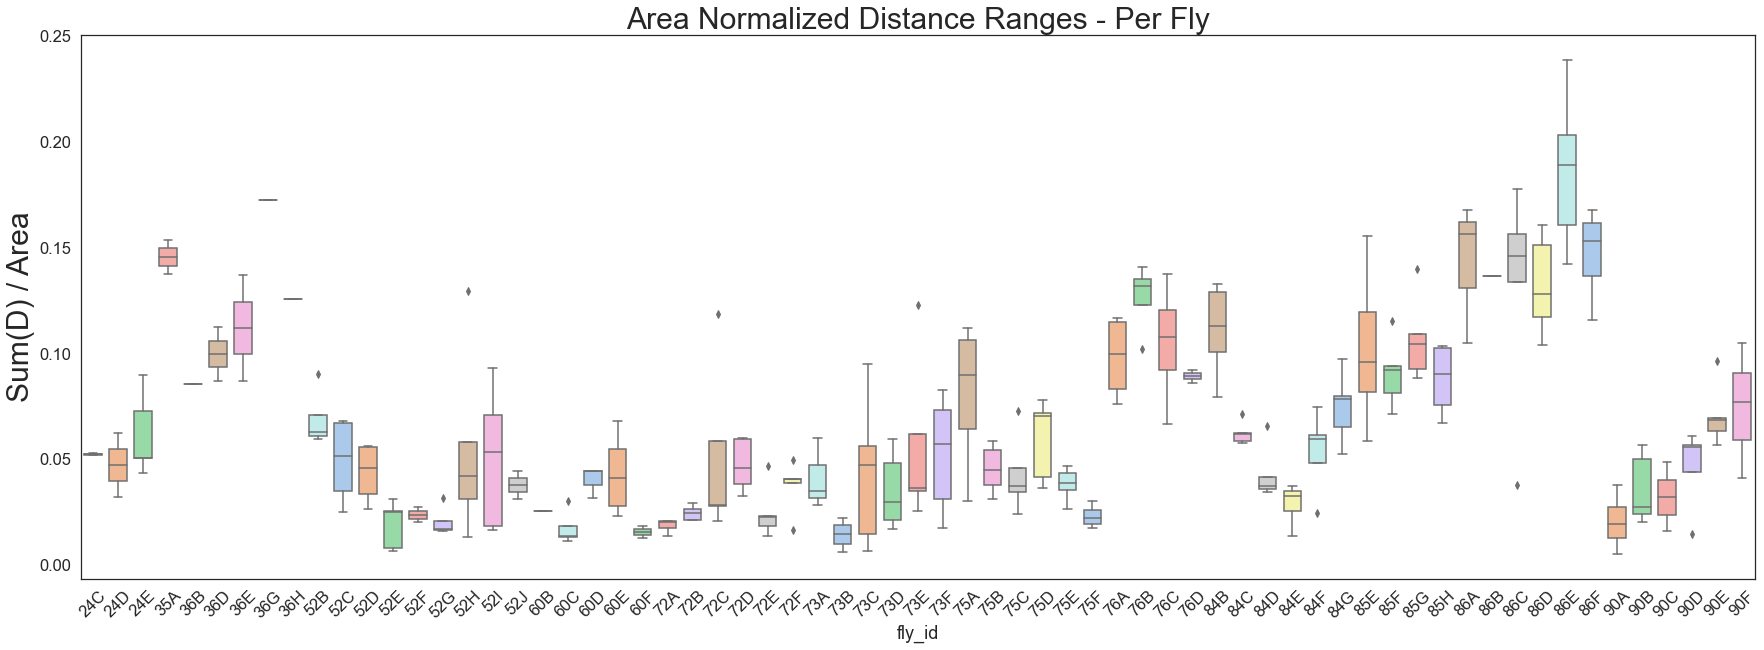

In [176]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data = per_fly_ranges[3:], ax=ax,width=0.7,palette="pastel")
ax.set_title("Area Normalized Distance Ranges - Per Fly",fontsize=30)
ax.set_ylabel("Sum(D) / Area", fontsize=30)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.tick_params(axis='x', labelrotation = 45)
fig.savefig(figure_outputs+"perfly_ranges_unsorted.png")

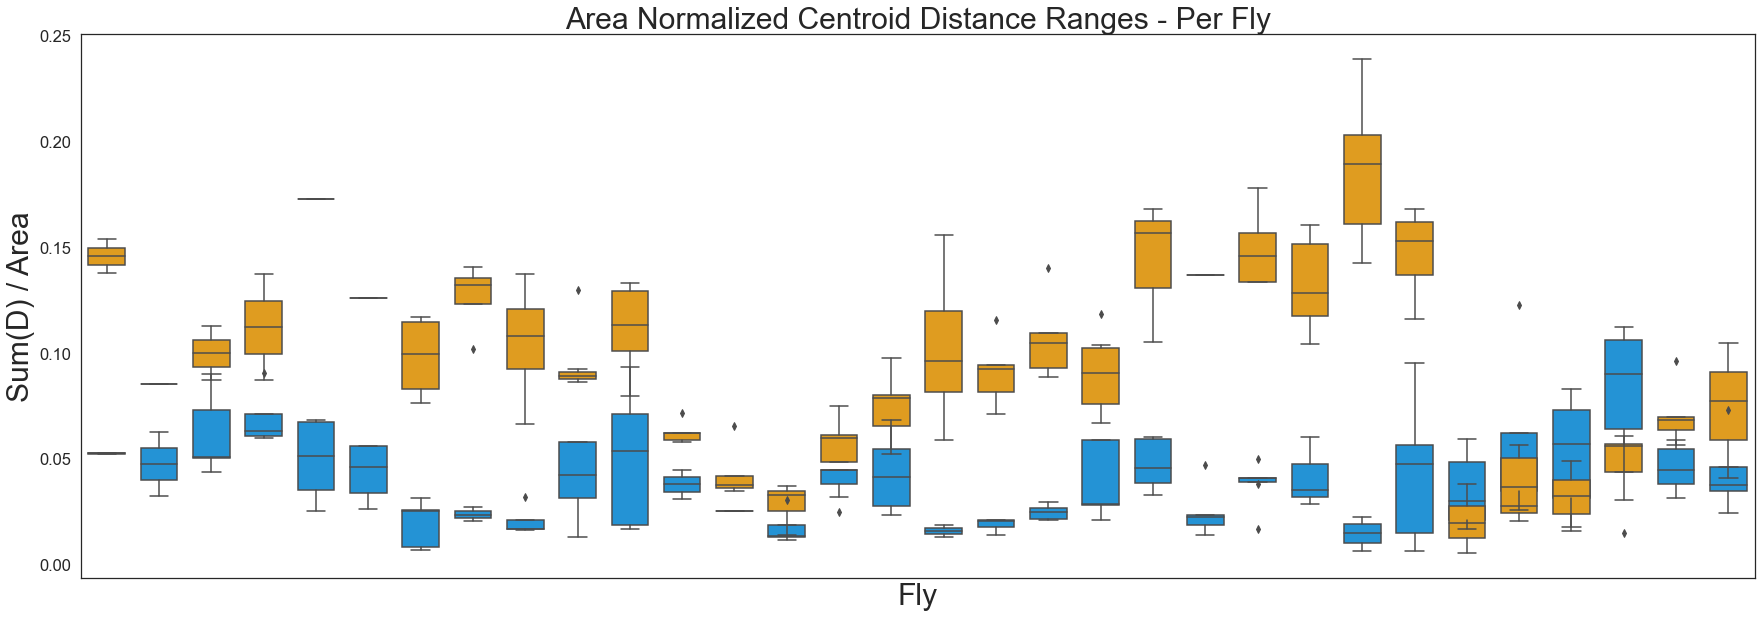

In [177]:
fed_areanorm = area_normalized_df[area_normalized_df['Condition']=='Fed']
starved_areanorm = area_normalized_df[area_normalized_df['Condition']=='Starved']
per_fly_ranges_fed = fed_areanorm.groupby('fly_id').describe().T.reset_index(0)
per_fly_ranges_fed = per_fly_ranges_fed.drop(labels='level_0',axis=1)

per_fly_ranges_starved = starved_areanorm.groupby('fly_id').describe().T.reset_index(0)
per_fly_ranges_starved = per_fly_ranges_starved.drop(labels='level_0',axis=1)

fig, axes = plt.subplots(figsize=(30,10))
sns.boxplot(data = per_fly_ranges_fed[3:], ax=axes,width=0.7,color="xkcd:azure")
sns.boxplot(data = per_fly_ranges_starved[3:], ax=axes,width=0.7,color="orange")
axes.set_xticks([])
axes.set_title("Area Normalized Cen troid Distance Ranges - Per Fly", fontsize=30)
axes.set_ylabel("Sum(D) / Area", fontsize=30)
axes.set_xlabel("Fly", fontsize=30)
fig.savefig(figure_outputs+"perfly_ranges.png")